# Lab 8 - **fMNIST** Classification with Dense Neural Networks
# Om Patel (8958837)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Dataset Info:** Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

[data source](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

In [58]:
df_train = pd.read_csv("S:\Conestoga\Learning_Subject\Foundation_of_ML\Labs\Lab2\CSCN8010-LAB2\data/fashion-mnist_train.csv")
df_test = pd.read_csv("S:\Conestoga\Learning_Subject\Foundation_of_ML\Labs\Lab2\CSCN8010-LAB2\data/fashion-mnist_test.csv")

In [59]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The first column named `label` identifies the clothing item that is depicted in the image. The other 784 columns named `pixel` represent the image.

## Exploring the Data **EDA**:

In [61]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [63]:
ndf_train = df_train.drop(columns=['label'])
ndf_train_label = df_train['label']

In [64]:
print("Training data feature shape is", ndf_train.shape)
print("Training data lable shape is", ndf_train_label.shape)

Training data feature shape is (60000, 784)
Training data lable shape is (60000,)


In [65]:
trnsfm = np.array(ndf_train)
final_train = trnsfm.reshape((60000, 28, 28))
print(final_train.shape)
print(ndf_train_label.shape)

(60000, 28, 28)
(60000,)


Above code helps to transform 1D array of 2D array of Image pixel values and there are intotal 60000 records.

9


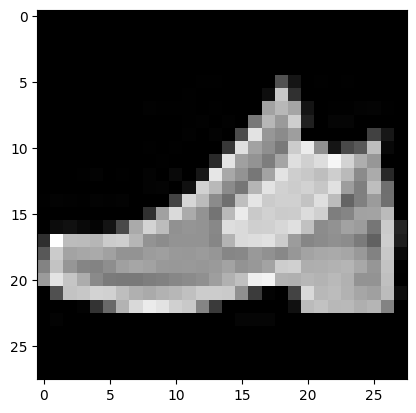

In [66]:
plt.imshow(final_train[1], cmap='gray')
print(ndf_train_label[1])

Now that we can see that the image is of shoes and it corresponds to lable 9. Lets see what is ment by lable 9.

The mapping between the numeric values in the label column and the category is defined as follows:

- 0 - T-shirt/top
- 1 - Trouser
- 2 - Pullover
- 3 - Dress
- 4 - Coat
- 5 - Sandal
- 6 - Shirt
- 7 - Sneaker
- 8 - Bag
- 9 - Ankle boot

Meaning that the Secound image in dataset is of **Ankle Boots**

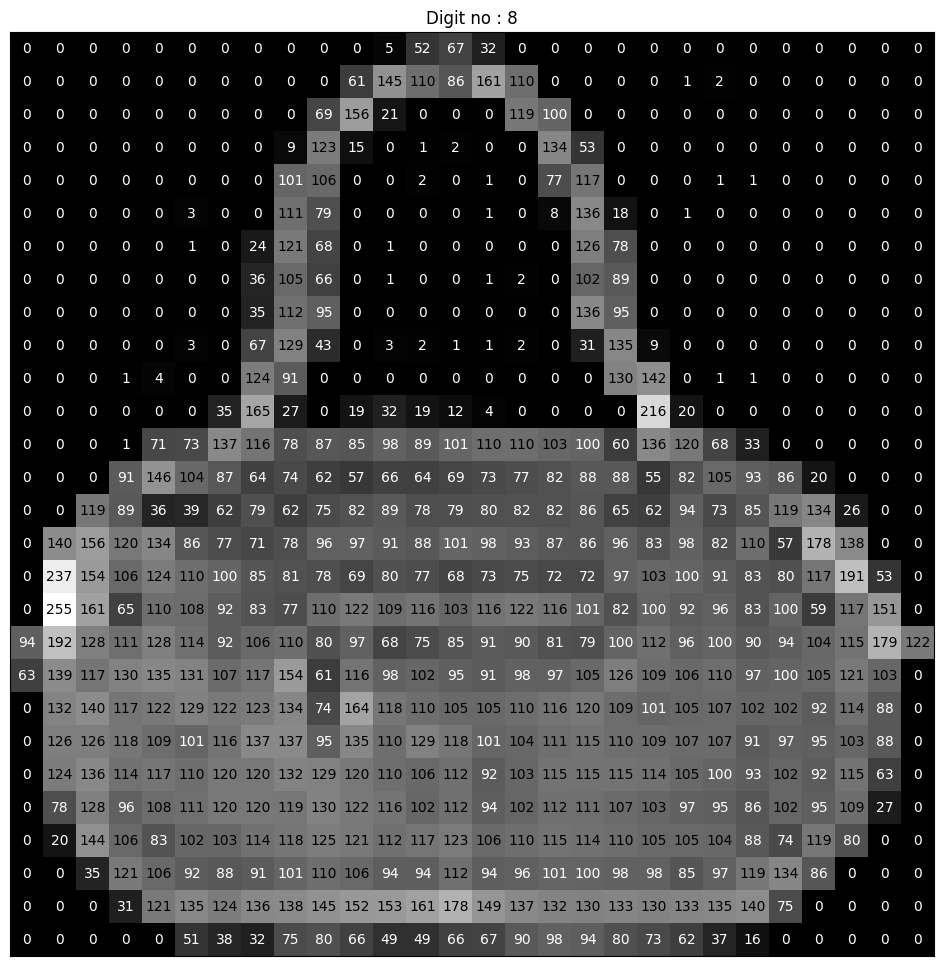

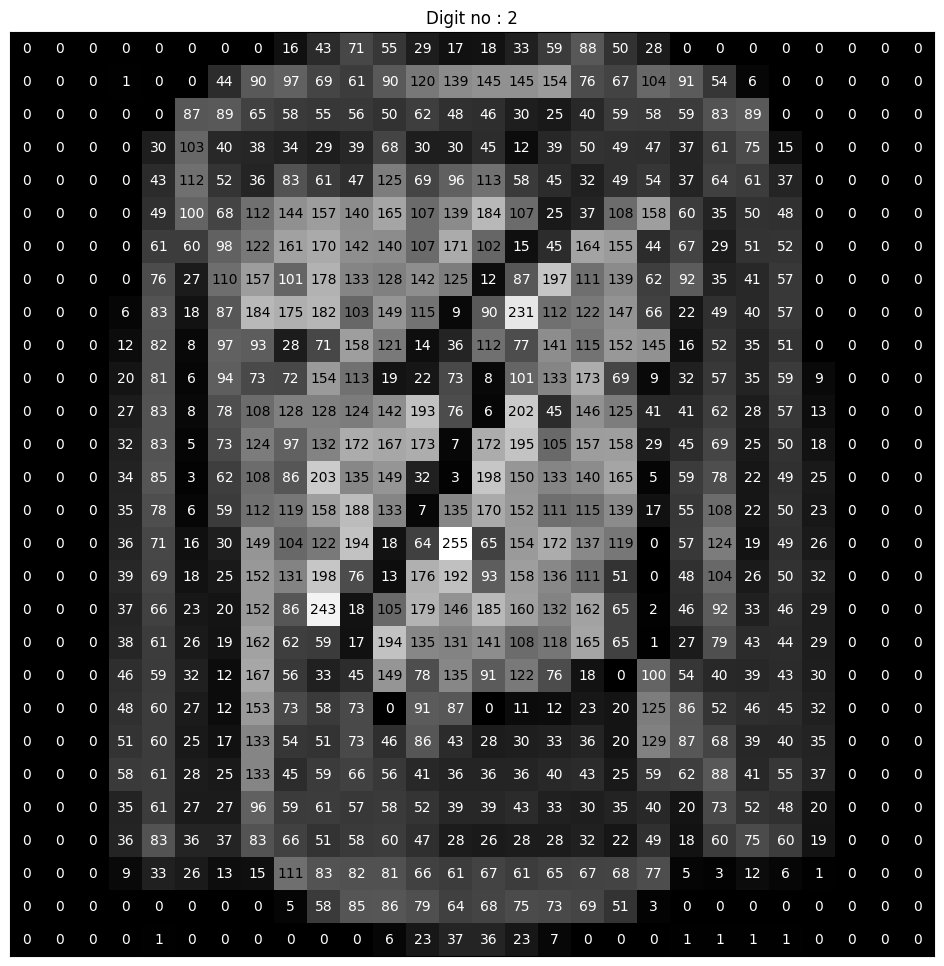

In [67]:
def visualize_input(i, ax, y):
    img = final_train[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Digit no : {y[i]}")
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])

for i in np.array([20,15]):
    fig = plt.figure(figsize = (12,12)) 
    ax = fig.add_subplot(111)
    visualize_input(i, ax, ndf_train_label)

From the above plot of images we can see each pixel value correspond to the image position, in which the highest is 255 and lowest is 0.
All this item's classes are listed on the title of each plot.

Now let's see how each categorical variable has its own images, this can be seen by the follwing code which i saw from a [keggle notebook](https://www.kaggle.com/code/eslamhani/fashion-mnist) 

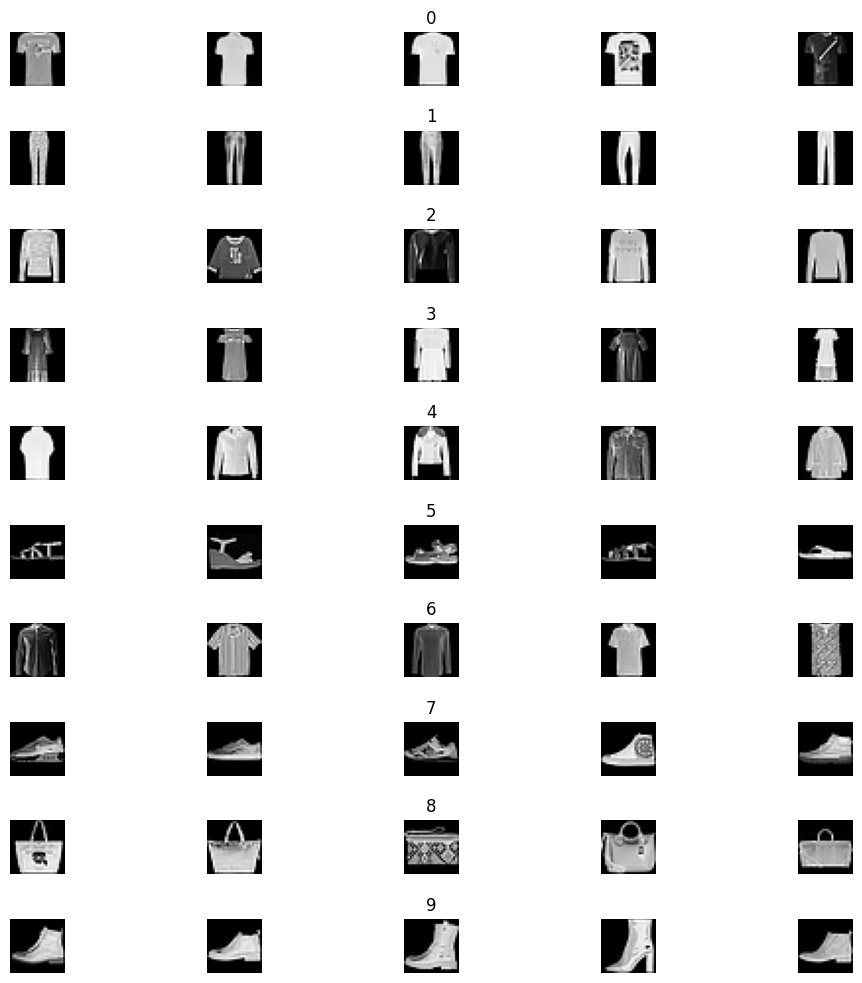

In [68]:
import random 

X_class_num = []
n_rows = 10
n_cols = 5

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,10))
fig.tight_layout()

for i in range(n_cols):
    for j in range(n_rows):
        x_select = final_train[ndf_train_label==j]
        ax[j][i].imshow(x_select[random.randint(0,len(x_select-1)),:,:], cmap='gray')
        ax[j][i].axis('off')
        
        if i == 2:
            ax[j][i].set_title(str(j))
            X_class_num.append(len(x_select))

These represents the likely images that each group has in the dataset. Next lets check how many number of images are in each class for the train set and test set.

In [69]:
df_train["label"].value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

In [70]:
df_test["label"].value_counts()

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64

From above result we can conclude that all the lables have equal no of counts. Hence, there no class inbalence

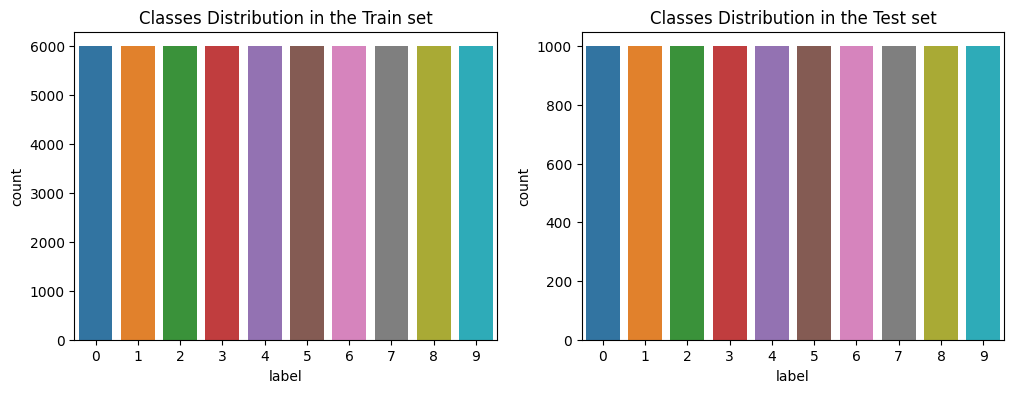

In [71]:
f, ax = plt.subplots(1,2, figsize=(12,4))
g1 = sns.countplot(data=df_train, x='label', ax=ax[0])
g2 = sns.countplot(data=df_test, x='label', ax=ax[1])

g1.set_title("Classes Distribution in the Train set")
g2.set_title("Classes Distribution in the Test set")
plt.show()  

## Data **Preprocessing** and **Spliting**:

In [72]:
y_train = df_train["label"]
X_train = df_train.drop(columns=["label"])
temp1 = np.array(X_train)
X_train = temp1.reshape((60000, 28 * 28))
y_test = df_test["label"]
X_test = df_test.drop(columns=["label"])
temp2 = np.array(X_test)
X_test = temp2.reshape((10000, 28 * 28))

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


We can see that all the `X_train` `X_test` `y_train` `y_test` variables have perfect shape.

Now, the data is splited in the desired format, we can move forward with the part of data Normalization

In [74]:
X_train = X_train.astype("float32") / 255  # by min-max approach
X_test = X_test.astype("float32") / 255

Deviding the testing data into testing and validation set.

In [75]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=28)     # spliting testing data into 2 equal parts

In [76]:
print(X_test.shape)
print(X_val.shape)

(5000, 784)
(5000, 784)


## Making the **Deep Learning** Model:

Firstly, we have to Define Deep Learning Model using Tensorflow library.

In [77]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

model = keras.Sequential([
    layers.Dense(300, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Secoundly, lets **compile** our Neural Network on training Data.

In [78]:
model.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Fitting** the Model on traing Data.

In [79]:
model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5543 - accuracy: 0.7988
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3877 - accuracy: 0.8570
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3438 - accuracy: 0.8724
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 0.8827
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2991 - accuracy: 0.8882
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2823 - accuracy: 0.8944
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2696 - accuracy: 0.8984
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2583 - accuracy: 0.9032
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2467 - accuracy: 0.9069
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2381 - accuracy: 0.9103

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model lists each layer (Total there are 3 layers) and its corresponding kind.

Output Shape shows how each layer's output is shaped. For instance, "(None,300)" denotes a tensor with dimensions (None,300) as the output form from the first Dense layer, where "None" denotes the batch size and 300 denotes the total number of units in that layer.


The number of trainable parameters in each layer are the weights and biases that are part of the corresponding layer, ex: first Dense layer has total 235,500 trainable parameters.

The total number of parameters in the entire model that can be trained is 266,610 parameters in this instance.


In [81]:
# Check for prediction for an example from testing dataset.
model.predict(X_test[5:6])

1/1 [==============================] - 0s 55ms/step


array([[5.1616556e-05, 6.4662553e-11, 9.9983108e-01, 9.6967433e-08,
        2.5421784e-06, 1.0256496e-12, 1.1465032e-04, 2.2873817e-13,
        9.5627783e-11, 3.0917537e-13]], dtype=float32)

Here is the result of the prediction and the value of class 3 is the highest among all other classes. Now this class 3 is equal to 2 class = Pullovers. So, lets see if it is right or not!!

2


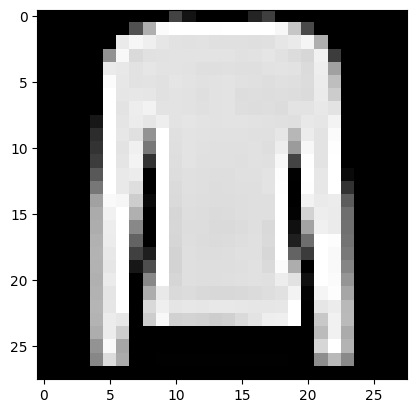

In [82]:
plt.imshow(X_test[5].reshape(28,28),cmap="gray")
print(y_test[5])

## Evaluate the model using the **Validation** Dataset.

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = np.argmax(model.predict(X_val), axis=-1)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_val, y_pred)

157/157 [==============================] - 0s 934us/step


In [84]:
print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Validation Accuracy: 0.8828
Validation Precision: 0.8891680830938503
Validation Recall: 0.8828
Validation F1 Score: 0.8832194832139896
Confusion Matrix:
[[476   0   4   3   0   0  26   0   1   0]
 [  4 507   1   4   0   1   0   0   0   0]
 [ 12   0 406   2  22   0  41   0   1   0]
 [ 33   3   7 452   2   0  17   0   0   0]
 [  5   1  44   8 340   0  93   0   0   0]
 [  0   0   0   0   0 480   0  10   1   5]
 [116   0  37   5  14   0 317   0   1   0]
 [  0   0   0   0   0   8   0 463   0  17]
 [  3   0   2   0   0   2   8   0 496   1]
 [  1   0   0   0   0   6   0  14   0 477]]


We can see that the model performs approx 89% accurately on Validation data. Hence, there is 90% chance of getting correct lablbe prediction from this DL model.

## Run model on **Test Set** of Data.

In [85]:
y_pred_test = np.argmax(model.predict(X_test), axis=-1)

  1/157 [..............................] - ETA: 2s

157/157 [==============================] - 0s 1ms/step


In [86]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

In [87]:
print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)

Test Accuracy: 0.8828
Test Precision: 0.8861697322127946
Test Recall: 0.8828


We can see that there is no much difference between the evaluatin results of Validation and Test set. Also almost 90% of prediction on test data are precise and accurate. Where as Recall suggests that how well model performed on unseen data.

Now, lets see where model fails using **Confusion Matrix**.

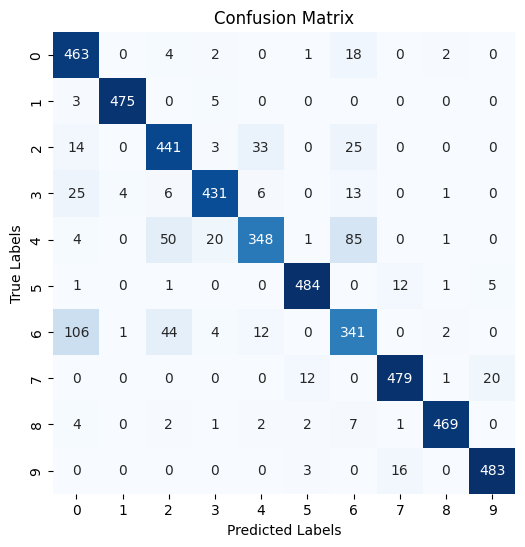

In [88]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

From the above Confusion Matrix we can conclude that Most of the labels ware correctly predicted. However, there is a class which has some problems in its prediction.

The class of 6 and 0 might have some correlation between their images as **We can see that from all the True lables of 6, Model predicted 106 ware of digit 0.** On the other hand, True lable of 0 is not predicted incorrectly by the model. **Same with the True lable 4 and Model's predicted value is 6.** 

## Adjusting Precision & Recall

In [89]:
# adjusting precision for class '5'
y_pred_test_adjusted = np.where(model.predict(X_test)[:, 5] > 0.8, 5, y_pred_test)

157/157 [==============================] - 0s 1ms/step


In [90]:
# adjusting recall for class '5'
y_pred_test_adjusted = np.where(model.predict(X_test)[:, 5] < 0.5, 5, y_pred_test)

157/157 [==============================] - 0s 1ms/step


In [91]:
# Evaluate adjusted predictions
adjusted_test_precision = precision_score(y_test, y_pred_test_adjusted, average='weighted')
adjusted_test_recall = recall_score(y_test, y_pred_test_adjusted, average='weighted')

s:\Conestoga\Learning_Subject\Foundation_of_ML\Resources\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
print("Adjusted Test Precision for Class '5':", adjusted_test_precision)
print("Adjusted Test Recall for Class '5':", adjusted_test_recall)

Adjusted Test Precision for Class '5': 0.01016064
Adjusted Test Recall for Class '5': 0.1008
